In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\91870'

In [3]:
cd Desktop/ML_DL/FULL_TENSORFLOW_NOTES__AND_DATA/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/

C:\Users\91870\Desktop\ML_DL\FULL_TENSORFLOW_NOTES__AND_DATA\Tensorflow-Bootcamp-master\02-TensorFlow-Basics


In [4]:
diabetes=pd.read_csv('pima-indians-diabetes.csv')

In [5]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max()-x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
diabetes['Group'].unique()

array(['B', 'C', 'A', 'D'], dtype=object)

In [12]:
n_p=tf.feature_column.numeric_column('Number_pregnant')
g_C=tf.feature_column.numeric_column('Glucose_concentration')
b_P=tf.feature_column.numeric_column('Blood_pressure')
tri=tf.feature_column.numeric_column('Triceps')
insu=tf.feature_column.numeric_column('Insulin')
bmi=tf.feature_column.numeric_column('BMI')
ped=tf.feature_column.numeric_column('Pedigree')
age=tf.feature_column.numeric_column('Age')

In [13]:
#what if we have a large dataset ?? use for loop

In [14]:
assigned_gp=tf.feature_column.categorical_column_with_vocabulary_list('Group',['B', 'C', 'A', 'D'])

In [15]:
#what if we get categories more than 10/20..... =>we'll use hashbuckets

In [16]:
#assigned_gp=tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [17]:
assigned_gp

VocabularyListCategoricalColumn(key='Group', vocabulary_list=('B', 'C', 'A', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

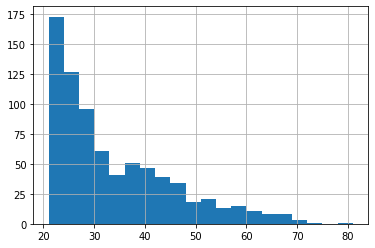

In [19]:
diabetes['Age'].hist(bins=20)

In [20]:
sge_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [21]:
#it ideally depends on the variance of your data you are transiting from continuous to categorical

In [22]:
feat_cols=[n_p,g_C,b_P,tri,insu,bmi,ped,age,assigned_gp,sge_bucket]

In [23]:
#train_test_split

In [24]:
x_data=diabetes.drop('Class',axis=1)

In [25]:
x_data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,B
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,A
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,C
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,C


In [26]:
labels=diabetes['Class']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [29]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [30]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\91870\\AppData\\Local\\Temp\\tmpo6_7ed4u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000186C5C7C188>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\91870\AppData\Local\Temp\tmpo6_7ed4u\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorfl

In [32]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [33]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-20T14:01:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\91870\AppData\Local\Temp\tmpo6_7ed4u\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-07-20-14:01:07
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.80218107, auc_precision_recall = 0.6543304, average_loss = 0.5268252, global_step = 1000, label/mean = 0.35064936, loss = 5.0706925, precision = 0.6567164, prediction/mean = 0.3662382, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\91870\AppData\Local\Temp\tmpo6_7ed4u\model.ckpt-1000


In [34]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [35]:
predictions=model.predict(pred_input_func)

In [36]:
my_pred=list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\91870\AppData\Local\Temp\tmpo6_7ed4u\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [37]:
my_pred

[{'logits': array([-0.11138922], dtype=float32),
  'logistic': array([0.47218147], dtype=float32),
  'probabilities': array([0.52781856, 0.47218144], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.507071], dtype=float32),
  'logistic': array([0.6241196], dtype=float32),
  'probabilities': array([0.3758804, 0.6241196], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.61961484], dtype=float32),
  'logistic': array([0.34986907], dtype=float32),
  'probabilities': array([0.6501309 , 0.34986904], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 

In [50]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,20,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\91870\\AppData\\Local\\Temp\\tmp46m8wnkk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001878EACD388>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
embedded_group_col=tf.feature_column.embedding_column(assigned_gp,dimension=4) #embedding needed for categorical variables

In [52]:
feat_cols=[n_p,g_C,b_P,tri,insu,bmi,ped,age,embedded_group_col,sge_bucket]

In [53]:
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [54]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\91870\\AppData\\Local\\Temp\\tmp2xe7g04c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001878EACD588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\91870\AppData\Local\Temp\tmp2xe7g04c\model.ckpt.
INFO:tensorflow:loss = 3.2755122, step = 0
INFO:tensorflow:global_step/sec: 148.289
INFO:tensorflow:loss = 6.7765417, step = 100 (0.659 sec)
INFO:tensorflow:global_step/sec: 168.122
INFO:tensorflow:loss = 5.651719, step = 200 (0.597 sec)
INFO:tensorflow:global_step/sec: 169.199
INFO:tensorflow:loss = 5.3263187, step = 300 (0.591 sec)
INFO:tensorflow:global_step/sec: 178.425
INFO:tensorflow:loss = 6.050739, step = 400 (0.558 sec)
INFO:tensorflow:global_step/sec: 181.005
INFO:tensorflow:loss = 5.3982844, step = 500 (0.554 sec)
INFO:tensorflow:global_step/sec: 178.412
INFO:tensorflow:loss = 6.4824185, step = 600 (0.561 sec)
INFO:tensorflow:global_step/se

In [56]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [57]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-20T14:05:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\91870\AppData\Local\Temp\tmp2xe7g04c\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-07-20-14:05:56
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7099567, accuracy_baseline = 0.64935064, auc = 0.7666667, auc_precision_recall = 0.61274105, average_loss = 0.55845594, global_step = 1000, label/mean = 0.35064936, loss = 5.3751388, precision = 0.675, prediction/mean = 0.3224688, recall = 0.33333334
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\91870\AppData\Local\Temp\tmp2xe7g04c\model.ckpt-1000


{'accuracy': 0.7099567,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7666667,
 'auc_precision_recall': 0.61274105,
 'average_loss': 0.55845594,
 'label/mean': 0.35064936,
 'loss': 5.3751388,
 'precision': 0.675,
 'prediction/mean': 0.3224688,
 'recall': 0.33333334,
 'global_step': 1000}